In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
import joblib

In [2]:
TEST = r"C:\Users\KIIT\Desktop\ONGC\CICIDS-17\combined_20_percent.csv"
TRAIN = r"C:\Users\KIIT\Desktop\ONGC\CICIDS-17\combined_80_percent.csv"
DATA = r"E:\ONGC\CICIDS-17\binary_all_in_one.csv"

In [3]:
df = pd.read_csv(DATA)

In [10]:
X = df.drop(' Label', axis=1).values
y = df[' Label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
import pandas as pd

# Check for infinite values in the entire DataFrame
infinite_values = df.isin([float('inf'), float('-inf')])

# Count the number of infinite values in each column
infinite_values_count = infinite_values.sum()

# Count the number of NaN values in each column
nan_values_count = df.isna().sum()

# Print the results
print("Number of infinite values and NaN values in each column:")
for column in df.columns:
    if (infinite_values_count[column] > 0) or (nan_values_count[column] > 0): 
        print(f"Column '{column}':")
        print(f"  Infinite values: {infinite_values_count[column]}")
        print(f"  NaN values: {nan_values_count[column]}")
        print()


Number of infinite values and NaN values in each column:
Column 'Flow Bytes/s':
  Infinite values: 1509
  NaN values: 1358

Column ' Flow Packets/s':
  Infinite values: 2867
  NaN values: 0



In [5]:
# Replace infinite values with float64 max
df.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)

In [6]:
import pandas as pd

# Check for infinite values in the entire DataFrame
infinite_values = df.isin([float('inf'), float('-inf')])

# Count the number of infinite values in each column
infinite_values_count = infinite_values.sum()

# Count the number of NaN values in each column
nan_values_count = df.isna().sum()

# Print the results
print("Number of infinite values and NaN values in each column:")
for column in df.columns:
    if (infinite_values_count[column] > 0) or (nan_values_count[column] > 0): 
        print(f"Column '{column}':")
        print(f"  Infinite values: {infinite_values_count[column]}")
        print(f"  NaN values: {nan_values_count[column]}")
        print()

Number of infinite values and NaN values in each column:
Column 'Flow Bytes/s':
  Infinite values: 0
  NaN values: 1358



In [8]:
# Impute NaN values with the median of each column
imputer = SimpleImputer(strategy='median')
df_mean = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [9]:
import pandas as pd

# Check for infinite values in the entire DataFrame
infinite_values = df_mean.isin([float('inf'), float('-inf')])

# Count the number of infinite values in each column
infinite_values_count = infinite_values.sum()

# Count the number of NaN values in each column
nan_values_count = df_mean.isna().sum()

# Print the results
print("Number of infinite values and NaN values in each column:")
for column in df_mean.columns:
    if (infinite_values_count[column] > 0) or (nan_values_count[column] > 0): 
        print(f"Column '{column}':")
        print(f"  Infinite values: {infinite_values_count[column]}")
        print(f"  NaN values: {nan_values_count[column]}")
        print()

Number of infinite values and NaN values in each column:


In [10]:
X = df_mean.drop(' Label', axis=1).values
y = df_mean[' Label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count


In [21]:
rows_before_removal = df.shape[0]
nan_rows_before_removal = df[df.isna().any(axis=1)].shape[0]

# Remove rows with NaN values
df_cleaned = df.dropna()

# Count the number of rows with NaN values after removing
rows_after_removal = df_cleaned.shape[0]
nan_rows_after_removal = df_cleaned[df_cleaned.isna().any(axis=1)].shape[0]

# Print the number of rows removed
rows_removed = rows_before_removal - rows_after_removal
nan_rows_removed = nan_rows_before_removal - nan_rows_after_removal
print(f"Number of rows removed: {rows_removed}")
print(f"Number of rows with NaN values removed: {nan_rows_removed}")

Number of rows removed: 1358
Number of rows with NaN values removed: 1358


In [22]:
X = df_cleaned.drop(' Label', axis=1).values
y = df_cleaned[' Label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
nan_indices = np.isnan(X)

# Count the number of NaN values in each column
nan_counts_per_column = np.sum(nan_indices, axis=0)

# Count the total number of NaN values in the entire array
total_nan_values = np.sum(nan_indices)

# Print the results
print("Number of NaN values in each column:")
print(nan_counts_per_column)

print("\nTotal number of NaN values in the entire array:", total_nan_values)

Number of NaN values in each column:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]

Total number of NaN values in the entire array: 0


### Random Forest

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, matthews_corrcoef, log_loss, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
import joblib

# Load the dataset from a CSV file and split into train and test sets
def load_and_split_dataset(file_path, test_size=0.2, random_state=42):
    df = pd.read_csv(file_path)
    X = df.drop(' Label', axis=1).values
    y = df[' Label'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Specify the path to the dataset CSV file
dataset_path = DATA

# Load and split the dataset
X_train, X_test, y_train, y_test = load_and_split_dataset(dataset_path)

# Handle infinite and large values
X_train[np.isinf(X_train)] = np.finfo('float64').max  # Replace infinite values with a large finite value
X_test[np.isinf(X_test)] = np.finfo('float64').max  # Replace infinite values with a large finite value

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the hyperparameters
n_estimators = 192
max_depth = 6
min_samples_split = 6
random_state = 96

# Create a Random Forest classifier
classifier = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    random_state=random_state
)

start_train = time.time()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

end_train = time.time()

print("Training time: {:.2f} seconds".format(end_train - start_train))

start_test = time.time()

# Make predictions on the testing data
predictions = classifier.predict(X_test)

end_test = time.time()

print("Testing time: {:.2f} seconds".format(end_test - start_test))

# Calculate evaluation metrics
auc = roc_auc_score(y_test, predictions)
classification = classification_report(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
mcc = matthews_corrcoef(y_test, predictions)
logloss = log_loss(y_test, classifier.predict_proba(X_test))

# Print the evaluation metrics
print("AUC: {:.4f}".format(auc))
print("Classification Report:\n", classification)
print("Accuracy: {:.4f}".format(accuracy))
print("MCC: {:.4f}".format(mcc))
print("Log Loss: {:.4f}".format(logloss))

from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# import joblib

# # Save the trained classifier model to a file
# model_filename = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\CICIDS\RF.pkl"
# joblib.dump(classifier, model_filename)





C:\Users\KIIT\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\KIIT\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\KIIT\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\KIIT\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Training time: 628.23 seconds
Testing time: 7.29 seconds
AUC: 0.9743
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    454658
           1       1.00      0.95      0.97    111491

    accuracy                           0.99    566149
   macro avg       0.99      0.97      0.98    566149
weighted avg       0.99      0.99      0.99    566149

Accuracy: 0.9893
MCC: 0.9660
Log Loss: 0.0556
Confusion Matrix:
[[454246    412]
 [  5640 105851]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


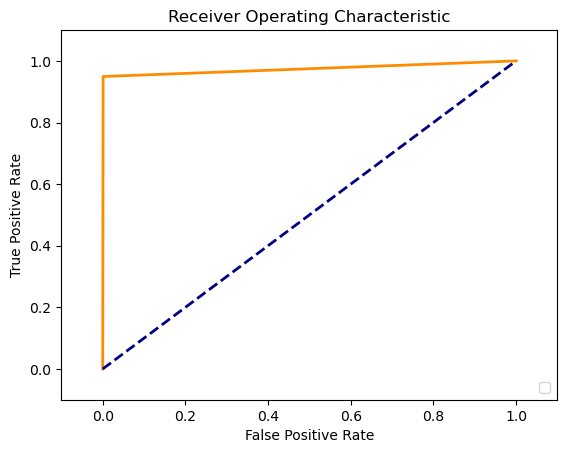

In [11]:
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot ROC Curve for Neural Network Model
y_pred_proba = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, matthews_corrcoef, log_loss
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time

# Load the dataset from a CSV file and split into train and test sets
def load_and_split_dataset(file_path, test_size=0.2, random_state=42):
    df = pd.read_csv(file_path)
    X = df.drop(' Label', axis=1).values
    y = df[' Label'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Specify the path to the dataset CSV file
dataset_path = DATA

# Load and split the dataset
X_train, X_test, y_train, y_test = load_and_split_dataset(dataset_path)

# Handle infinite and large values
X_train[np.isinf(X_train)] = np.finfo('float64').max  # Replace infinite values with a large finite value
X_test[np.isinf(X_test)] = np.finfo('float64').max  # Replace infinite values with a large finite value

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

start_train = time.time()

# Create a Decision Tree classifier
classifier = DecisionTreeClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

end_train = time.time()

print("Training time: {:.2f} seconds".format(end_train - start_train))

start_test = time.time()

# Make predictions on the testing data
predictions = classifier.predict(X_test)

end_test = time.time()

print("Testing time: {:.2f} seconds".format(end_test - start_test))

# Calculate evaluation metrics
auc = roc_auc_score(y_test, predictions)
classification = classification_report(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
mcc = matthews_corrcoef(y_test, predictions)
logloss = log_loss(y_test, classifier.predict_proba(X_test))

# Print the evaluation metrics
print("AUC: {:.4f}".format(auc))
print("Classification Report:\n", classification)
print("Accuracy: {:.4f}".format(accuracy))
print("MCC: {:.4f}".format(mcc))
print("Log Loss: {:.4f}".format(logloss))

from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# import joblib

# # Save the trained classifier model to a file
# model_filename = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\CICIDS\DT.pkl"
# joblib.dump(classifier, model_filename)


C:\Users\KIIT\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\KIIT\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\KIIT\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\KIIT\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Training time: 129.04 seconds
Testing time: 0.15 seconds
AUC: 0.9999
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    454658
           1       1.00      1.00      1.00    111491

    accuracy                           1.00    566149
   macro avg       1.00      1.00      1.00    566149
weighted avg       1.00      1.00      1.00    566149

Accuracy: 0.9999
MCC: 0.9997
Log Loss: 0.0030
Confusion Matrix:
[[454622     36]
 [    13 111478]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


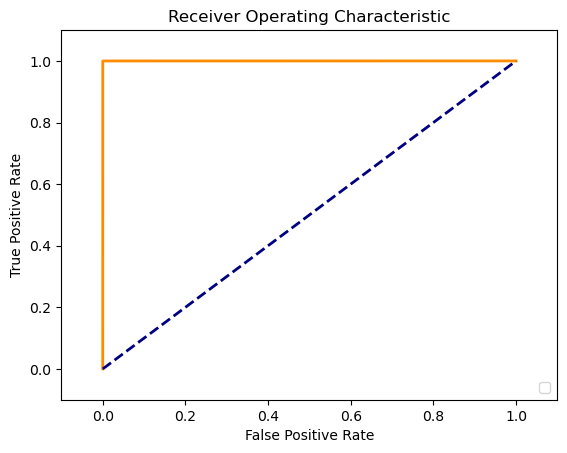

In [7]:
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot ROC Curve for Neural Network Model
y_pred_proba = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Extremely Randomized Tree

In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, matthews_corrcoef, log_loss
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time

# Load the dataset from a CSV file and split into train and test sets
def load_and_split_dataset(file_path, test_size=0.2, random_state=42):
    df = pd.read_csv(file_path)
    X = df.drop(' Label', axis=1).values
    y = df[' Label'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Specify the path to the dataset CSV file
dataset_path = DATA

# Load and split the dataset
X_train, X_test, y_train, y_test = load_and_split_dataset(dataset_path)

# Handle infinite and large values
X_train[np.isinf(X_train)] = np.finfo('float64').max  # Replace infinite values with a large finite value
X_test[np.isinf(X_test)] = np.finfo('float64').max  # Replace infinite values with a large finite value

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

start_train = time.time()

# Create an Extra Trees classifier
classifier = ExtraTreesClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

end_train = time.time()

print("Training time: {:.2f} seconds".format(end_train - start_train))

start_test = time.time()

# Make predictions on the testing data
predictions = classifier.predict(X_test)

end_test = time.time()

print("Testing time: {:.2f} seconds".format(end_test - start_test))

# Calculate evaluation metrics
auc = roc_auc_score(y_test, predictions)
classification = classification_report(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
mcc = matthews_corrcoef(y_test, predictions)
logloss = log_loss(y_test, classifier.predict_proba(X_test))

# Print the evaluation metrics
print("AUC: {:.4f}".format(auc))
print("Classification Report:\n", classification)
print("Accuracy: {:.4f}".format(accuracy))
print("MCC: {:.4f}".format(mcc))
print("Log Loss: {:.4f}".format(logloss))

from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# import joblib

# # # Save the trained classifier model to a file
# # model_filename = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\CICIDS\ET.pkl"
# # joblib.dump(classifier, model_filename)

C:\Users\KIIT\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\KIIT\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\KIIT\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\KIIT\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Training time: 239.62 seconds
Testing time: 7.61 seconds
AUC: 0.9997
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    454658
           1       1.00      1.00      1.00    111491

    accuracy                           1.00    566149
   macro avg       1.00      1.00      1.00    566149
weighted avg       1.00      1.00      1.00    566149

Accuracy: 0.9998
MCC: 0.9995
Log Loss: 0.0007
Confusion Matrix:
[[454627     31]
 [    60 111431]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


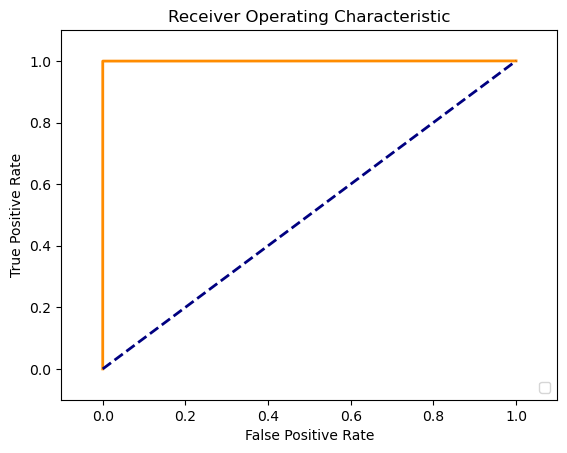

In [13]:
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot ROC Curve for Neural Network Model
y_pred_proba = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### AdaBoost

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, matthews_corrcoef, log_loss
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time

# Load the dataset from a CSV file and split into train and test sets
def load_and_split_dataset(file_path, test_size=0.2, random_state=42):
    df = pd.read_csv(file_path)
    X = df.drop(' Label', axis=1).values
    y = df[' Label'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Specify the path to the dataset CSV file
dataset_path = DATA

# Load and split the dataset
X_train, X_test, y_train, y_test = load_and_split_dataset(dataset_path)

# Handle infinite and large values
X_train[np.isinf(X_train)] = np.finfo('float64').max  # Replace infinite values with a large finite value
X_test[np.isinf(X_test)] = np.finfo('float64').max  # Replace infinite values with a large finite value

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

start_train = time.time()

# Create an AdaBoost classifier
classifier = AdaBoostClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

end_train = time.time()

print("Training time: {:.2f} seconds".format(end_train - start_train))

start_test = time.time()

# Make predictions on the testing data
predictions = classifier.predict(X_test)

end_test = time.time()

print("Testing time: {:.2f} seconds".format(end_test - start_test))

# Calculate evaluation metrics
auc = roc_auc_score(y_test, predictions)
classification = classification_report(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
mcc = matthews_corrcoef(y_test, predictions)
logloss = log_loss(y_test, classifier.predict_proba(X_test))

# Print the evaluation metrics
print("AUC: {:.4f}".format(auc))
print("Classification Report:\n", classification)
print("Accuracy: {:.4f}".format(accuracy))
print("MCC: {:.4f}".format(mcc))
print("Log Loss: {:.4f}".format(logloss))

from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# import joblib

# # Save the trained classifier model to a file
# model_filename = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\CICIDS\AdaB.pkl"
# joblib.dump(classifier, model_filename)


C:\Users\KIIT\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\KIIT\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\KIIT\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\KIIT\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Training time: 443.83 seconds
Testing time: 7.70 seconds
AUC: 0.9991
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    454658
           1       1.00      1.00      1.00    111491

    accuracy                           1.00    566149
   macro avg       1.00      1.00      1.00    566149
weighted avg       1.00      1.00      1.00    566149

Accuracy: 0.9996
MCC: 0.9989
Log Loss: 0.4588
Confusion Matrix:
[[454656      2]
 [   203 111288]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


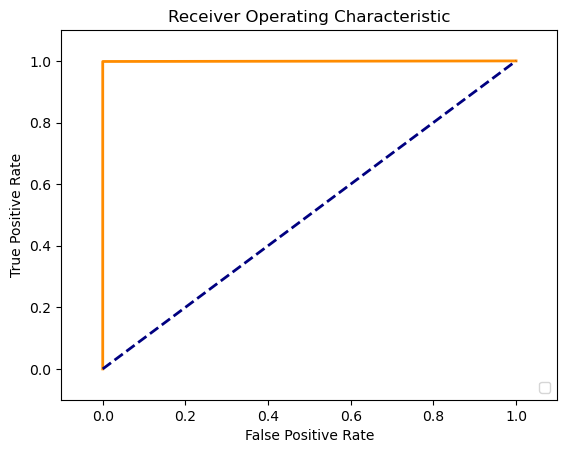

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot ROC Curve for Neural Network Model
y_pred_proba = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [16]:
MODEL_GB = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\CICIDS\GB.pkl"
MODEL_RF = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\CICIDS\RF.pkl"
MODEL_DT = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\CICIDS\DT.pkl"
MODEL_ET = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\CICIDS\ET.pkl"
MODEL_AdaB = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\CICIDS\AdaB.pkl"
MODEL_NN = r"C:\Users\KIIT\Desktop\SEM-VII\Major Project\CICIDS\NN.pkl"

# Ensemble Voting Method

C:\Users\KIIT\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\KIIT\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\KIIT\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\KIIT\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Confusion Matrix:
[[454657      1]
 [   198 111293]]
Accuracy: 0.99964850
AUC: 0.99911094
Log Loss: 0.4588


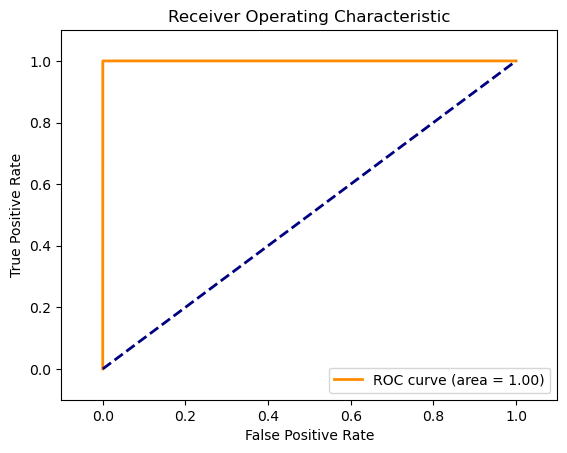

In [21]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, roc_auc_score
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, matthews_corrcoef, log_loss, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
import joblib

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def load_models(model_paths):
    models = []
    for path in model_paths:
        model = joblib.load(path)
        models.append(model)
    return models

def ensemble_voting(models, data):
    predictions = []
    for model in models:
        prediction = model.predict(data)
        predictions.append(prediction.astype(int))  # Convert predictions to integers
    final_predictions = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions)
    return final_predictions

def main(dataset_path, model_paths):
    # Load the dataset
    dataset = pd.read_csv(dataset_path)

    # Extract features (X) and labels (y)
    X = dataset.drop(' Label', axis=1)  
    y = dataset[' Label']  

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Handle infinite and large values
    X_train[np.isinf(X_train)] = np.finfo('float64').max  # Replace infinite values with a large finite value
    X_test[np.isinf(X_test)] = np.finfo('float64').max  # Replace infinite values with a large finite value

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Load the ensemble models
    models = load_models(model_paths)

    # Make predictions using ensemble voting on the test set
    final_predictions = ensemble_voting(models, X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, final_predictions)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, final_predictions)
    
    # Calculate the AUC
    auc = roc_auc_score(y_test, final_predictions)

    # Calculate the log loss using one of the models (assuming they have similar outputs)
    logloss = log_loss(y_test, models[0].predict_proba(X_test))

    # Print the confusion matrix, accuracy, AUC, and log loss
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy: {:.8f}".format(accuracy))
    print("AUC: {:.8f}".format(auc))
    print("Log Loss: {:.4f}".format(logloss))
    
    # Calculate the predicted probabilities for ensemble voting
    ensemble_probs = np.mean([model.predict_proba(X_test) for model in models], axis=0)

    # Plot the ROC curve for ensemble predictions
    plot_roc_curve(y_test, ensemble_probs[:, 1])

if __name__ == "__main__":
    dataset_path = DATA  # Replace with the actual path to your dataset
    model_paths = [MODEL_NN, MODEL_DT, MODEL_ET, MODEL_AdaB, MODEL_GB] # Replace with the paths to your .pkl models
    main(dataset_path, model_paths)
